# Exploration: positives per province

Finding the total infections and percentage of the population infected is what I'm doing here. Also I'll plot a correlation matrix.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_positives = pd.read_csv('/work/covid-19_ecuador/data/processed/positives.csv')

In [ ]:
df_positives

,created_at,provincia,poblacion,total,nuevas,lat,lng
0,2020-03-13,Azuay,881394,0,0,-2.897414,-79.004481
1,2020-03-13,Bolívar,209933,0,0,-1.605556,-79.003056
2,2020-03-13,Carchi,186869,0,0,0.812180,-77.716330
3,2020-03-13,Cañar,281396,0,0,-2.733333,-78.833333
4,2020-03-13,Chimborazo,524004,0,0,-1.674347,-78.648294
...,...,...,...,...,...,...,...
15091,2021-12-01,Santa Elena,401178,4602,3,-2.226700,-80.858300
15092,2021-12-01,Sto. Domingo Tsáchilas,511151,12639,18,-0.254167,-79.171944
15093,2021-12-01,Sucumbíos,230503,6391,20,0.084722,-76.882778
15094,2021-12-01,Tungurahua,590600,16186,5,-1.241667,-78.619722


In [ ]:
df_positives.dtypes

created_at     object
provincia      object
poblacion       int64
total           int64
nuevas          int64
lat           float64
lng           float64
dtype: object

In [ ]:
df_positives['created_at'] = pd.to_datetime(df_positives['created_at'])

In [ ]:
df_positives['year'] = df_positives['created_at'].dt.year
df_positives['month'] = df_positives['created_at'].dt.month
df_positives['day'] = df_positives['created_at'].dt.day
df_positives['day_of_week'] = df_positives['created_at'].dt.day_of_week
df_positives['quarter'] = df_positives['created_at'].dt.quarter

In [ ]:
df_positives.set_index('created_at', inplace=True)

In [ ]:
df_positives.to_csv('/work/covid-19_ecuador/data/interim/positives.csv')

In [ ]:
df_positives

,provincia,poblacion,total,nuevas,lat,lng,year,month,day,day_of_week,quarter
created_at,,,,,,,,,,,
2020-03-13,Azuay,881394,0,0,-2.897414,-79.004481,2020,3,13,4,1
2020-03-13,Bolívar,209933,0,0,-1.605556,-79.003056,2020,3,13,4,1
2020-03-13,Carchi,186869,0,0,0.812180,-77.716330,2020,3,13,4,1
2020-03-13,Cañar,281396,0,0,-2.733333,-78.833333,2020,3,13,4,1
2020-03-13,Chimborazo,524004,0,0,-1.674347,-78.648294,2020,3,13,4,1
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,Santa Elena,401178,4602,3,-2.226700,-80.858300,2021,12,1,2,4
2021-12-01,Sto. Domingo Tsáchilas,511151,12639,18,-0.254167,-79.171944,2021,12,1,2,4
2021-12-01,Sucumbíos,230503,6391,20,0.084722,-76.882778,2021,12,1,2,4


In [ ]:
df_positives.describe()

,poblacion,total,nuevas,lat,lng,year,month,day,quarter,day_of_week
count,1.509600e+04,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000
mean,7.278640e+05,10929.931969,35.586248,-1.396142,-79.222258,2020.532591,6.806041,15.899841,2.608903,3.000000
std,9.998210e+05,24258.957263,110.409294,1.365530,2.323672,0.498953,3.104112,8.797846,1.036561,2.001655
min,3.304200e+04,0.000000,0.000000,-4.120000,-89.400000,2020.000000,1.000000,1.000000,1.000000,0.000000
25%,1.941185e+05,1589.000000,1.000000,-2.245025,-79.283333,2020.000000,4.000000,8.000000,2.000000,1.000000
50%,4.824865e+05,4159.000000,8.000000,-1.154167,-78.816666,2021.000000,7.000000,16.000000,3.000000,3.000000
75%,6.222500e+05,9931.000000,29.000000,-0.413542,-78.127167,2021.000000,9.000000,23.000000,3.000000,5.000000
max,4.387434e+06,196301.000000,3388.000000,1.050000,-76.882778,2021.000000,12.000000,31.000000,4.000000,6.000000


In [ ]:
df_positives.dtypes

provincia       object
poblacion        int64
total            int64
nuevas           int64
lat            float64
lng            float64
year             int64
month            int64
day              int64
quarter          int64
day_of_week      int64
dtype: object

Let's visualize data.

In [ ]:
sns.set_theme()

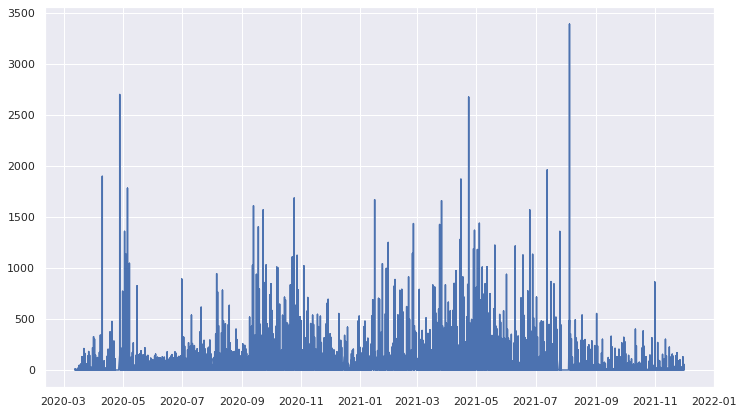

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(df_positives.index, df_positives['nuevas'])
plt.show()

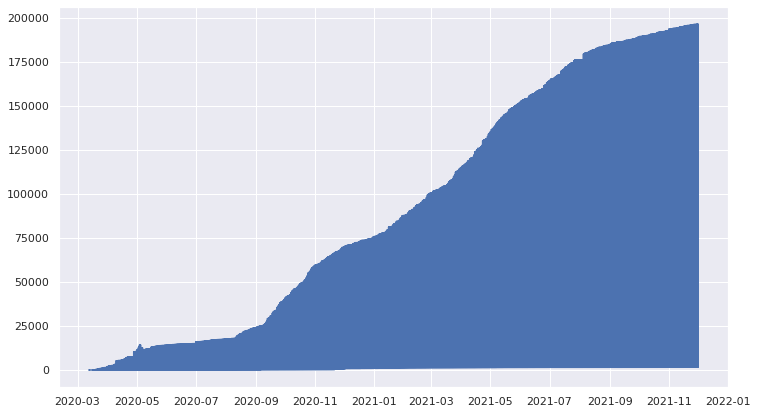

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(df_positives.index, df_positives['total'])
plt.show()

## Cases per province

In [ ]:
total_province = df_positives.groupby('provincia')[['nuevas']].sum().sort_values(by='nuevas', ascending=False)

In [ ]:
total_province

,nuevas
provincia,
Pichincha,196351
Guayas,78582
Manabí,36048
Azuay,29470
El Oro,24602
Loja,18843
Imbabura,17921
Tungurahua,16212
Los Ríos,14157


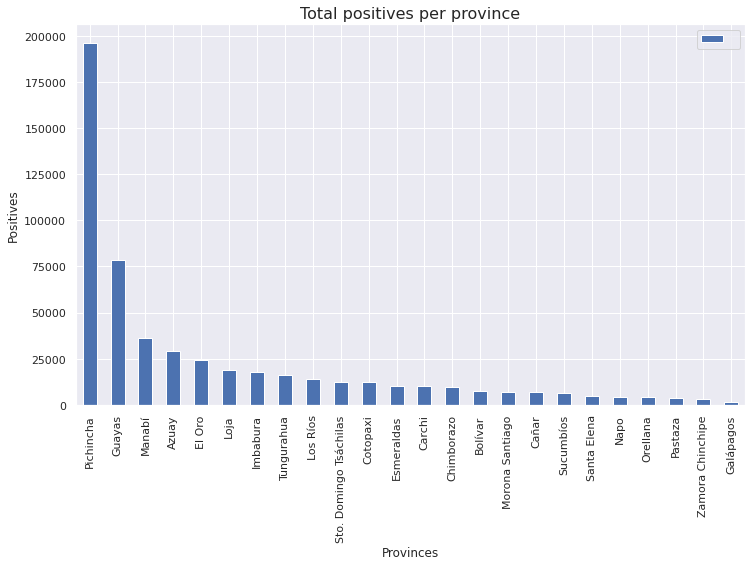

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
total_province.plot.bar(ax=ax)
plt.title('Total positives per province', size=16)
plt.ylabel('Positives')
plt.xlabel('Provinces')
plt.legend(' ')
plt.show()

In [ ]:
poblacion = df_positives.groupby('provincia')[['poblacion']].max().sort_values(by='poblacion', ascending=False)

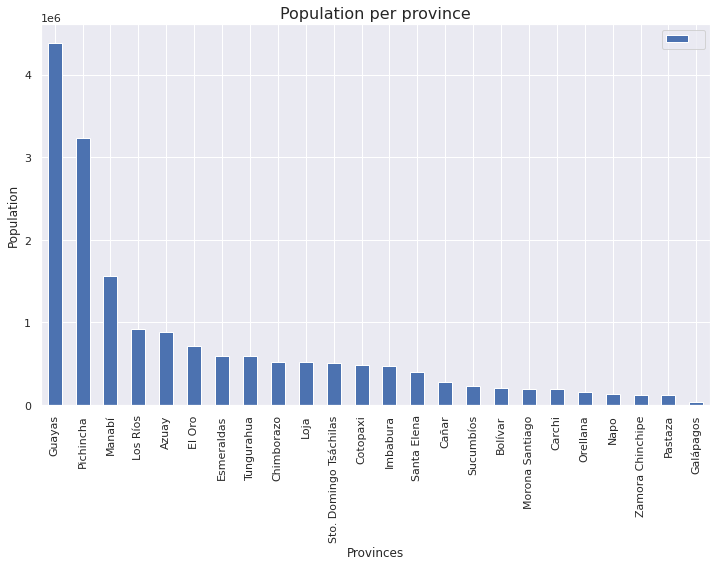

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
poblacion.plot.bar(ax=ax)
plt.title('Population per province', size=16)
plt.ylabel('Population')
plt.xlabel('Provinces')
plt.legend(' ')
plt.show()

In [ ]:
positives_provinces = total_province.join(poblacion, how='outer')

In [ ]:
positives_provinces.columns

Index(['nuevas', 'poblacion'], dtype='object')

In [ ]:
positives_provinces.rename(columns={'nuevas': 'nuevas_total'}, inplace=True)

In [ ]:
positives_provinces['positive_percentage'] = (positives_provinces['nuevas_total'] / positives_provinces['poblacion']) * 100

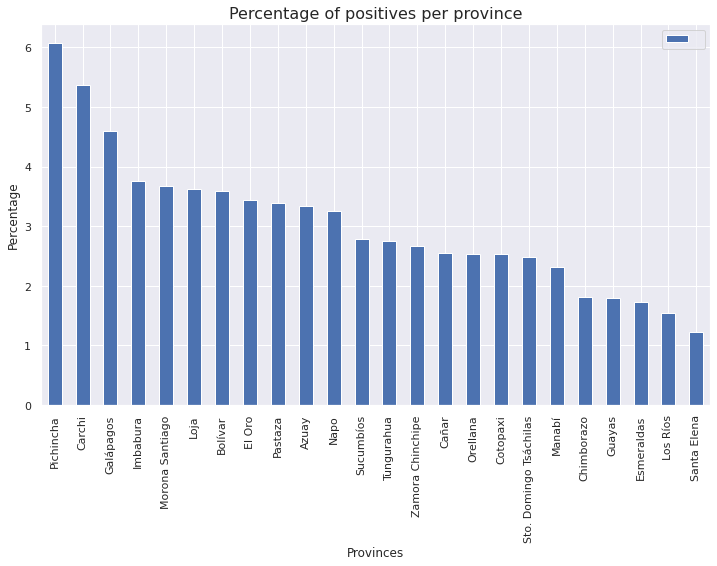

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
positives_provinces.sort_values(by='positive_percentage', 
    ascending=False).plot(kind='bar', 
    y='positive_percentage', 
    ax=ax)
plt.title('Percentage of positives per province', size=16)
plt.ylabel('Percentage')
plt.xlabel('Provinces')
plt.legend(' ')
plt.show()

In [ ]:
positives_provinces.columns

Index(['nuevas_total', 'poblacion', 'positive_percentage'], dtype='object')

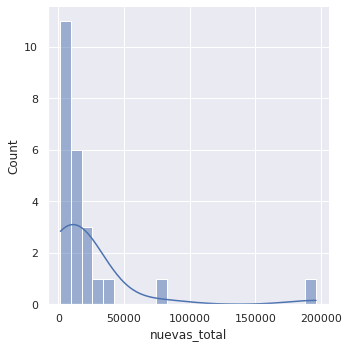

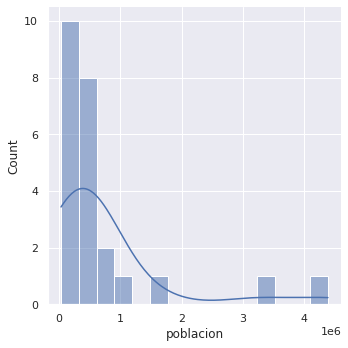

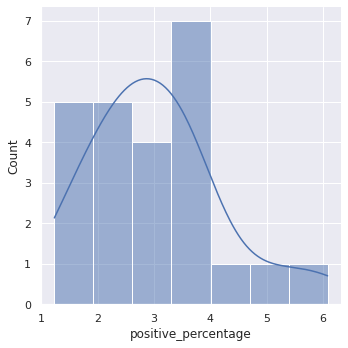

In [ ]:
for i in positives_provinces.columns:
  sns.displot(data=positives_provinces, x=i, kde=True)  



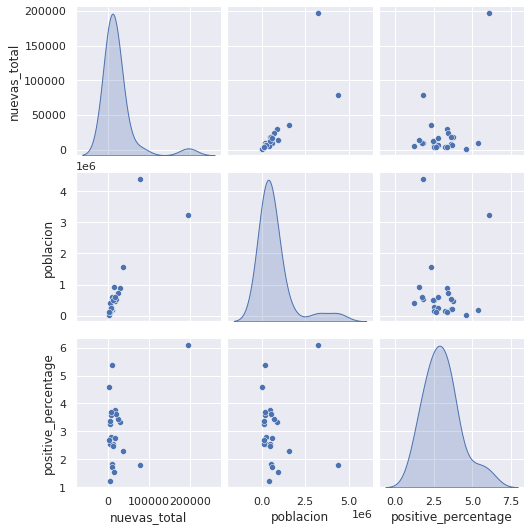

In [ ]:
sns.pairplot(positives_provinces, diag_kind='kde')

In [ ]:
positives_provinces.corr()

,nuevas_total,poblacion,positive_percentage
nuevas_total,1.000000,0.805845,0.437083
poblacion,0.805845,1.000000,0.027047
positive_percentage,0.437083,0.027047,1.000000


<AxesSubplot:>

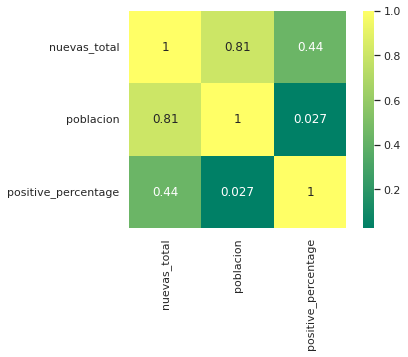

In [ ]:
sns.heatmap(positives_provinces.corr(), 
annot=True,
square=True,
cmap='summer')

* There's a high positive correlation between population and new positives. 
* There's a low positive correlation between positive percentage and new positives.
* There's no correlation between population and postive percentages. 

We can try to find clusters using the K-Means algorithm. But we can do tha later. 

Read this: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

### Export data

In [ ]:
positives_provinces.reset_index().to_csv('/work/covid-19_ecuador/data/interim/positives_provinces.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=298bb443-d8b3-4731-ae95-ca4418ea078f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>